**Filtering**
Image filtering involves modifying or enhancing an image by applying a filter or a set of filters to the pixels in the image. Filters are mathematical operations that are applied to each pixel or a neighborhood of pixels in the image to achieve various effects such as blurring, sharpening, edge detection, noise reduction, etc. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


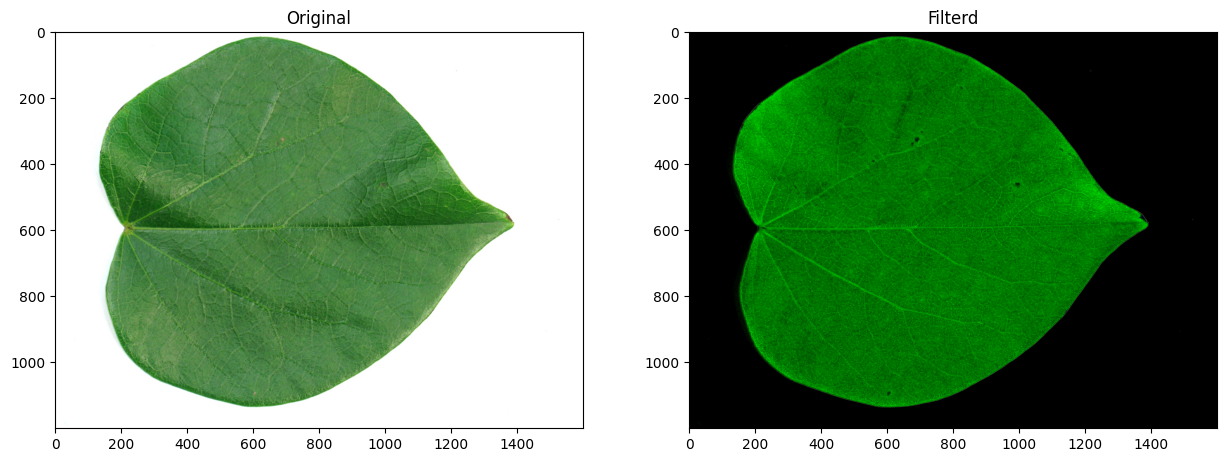

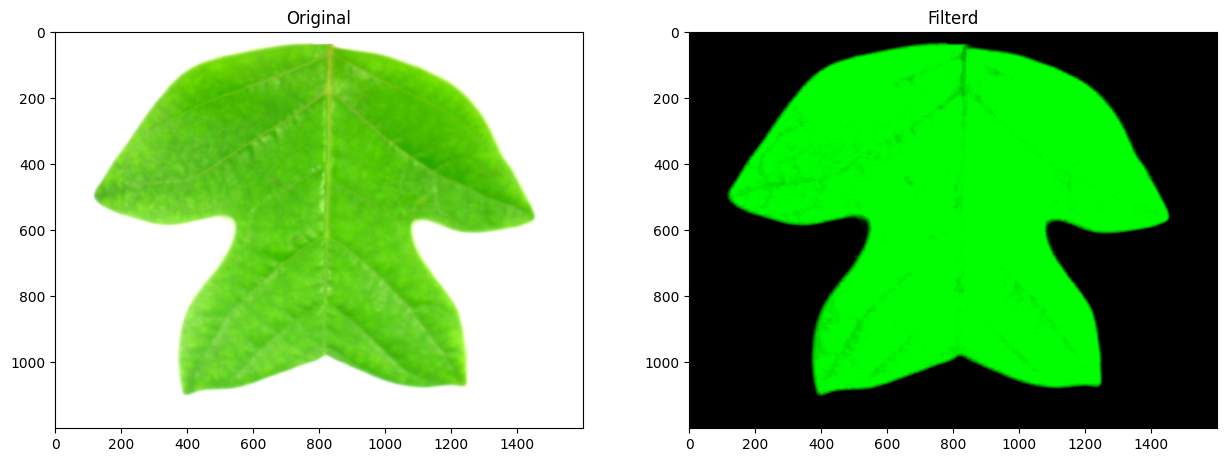

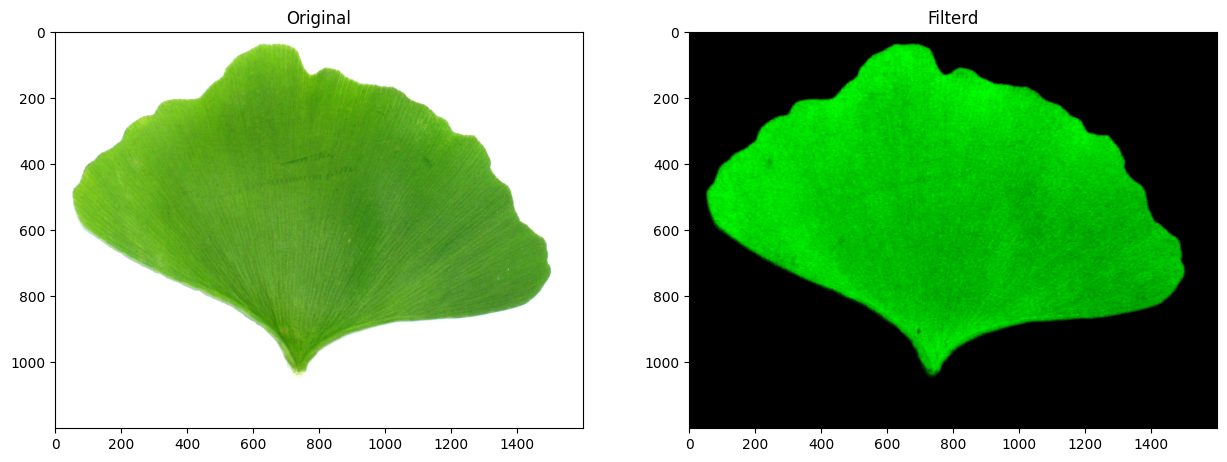

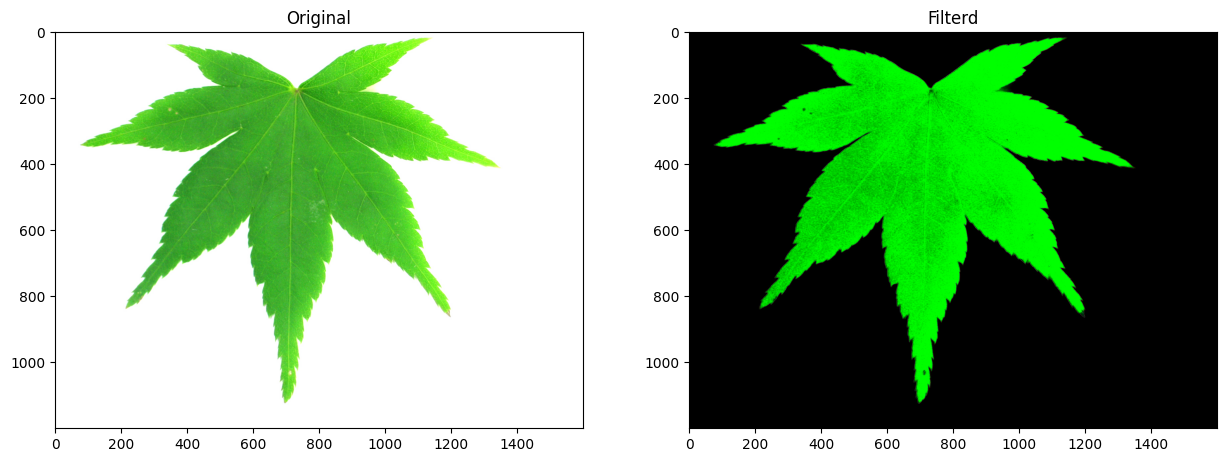

In [1]:
import cv2
import matplotlib.pyplot as plt 
from skimage import filters
from main import images



for image in images:
  plt.figure(figsize=(15, 15))
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title('Original')
  plt.subplot(1, 2, 2)
  edges = filters.laplace(image)
  plt.imshow(edges)
  plt.title('Filterd')


**SEGMENTATION**
The process of deviding an image into multiple regions, The output of an image segmentation process is typically a labeled image where different regions or objects are distinctly identified by unique labels or colors.

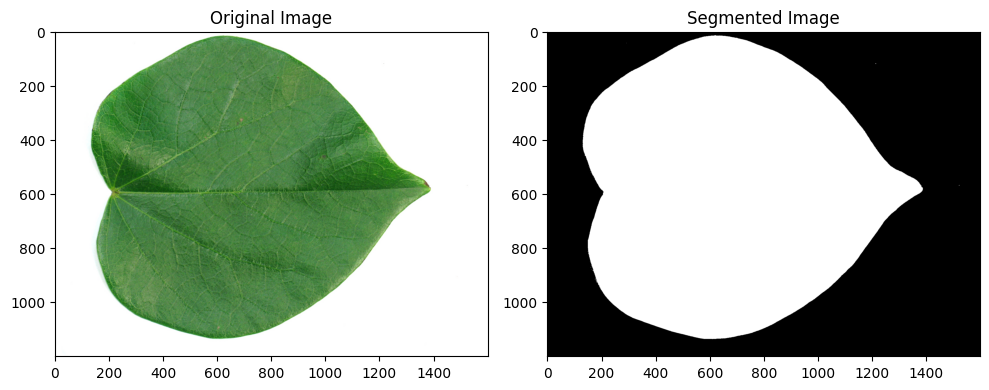

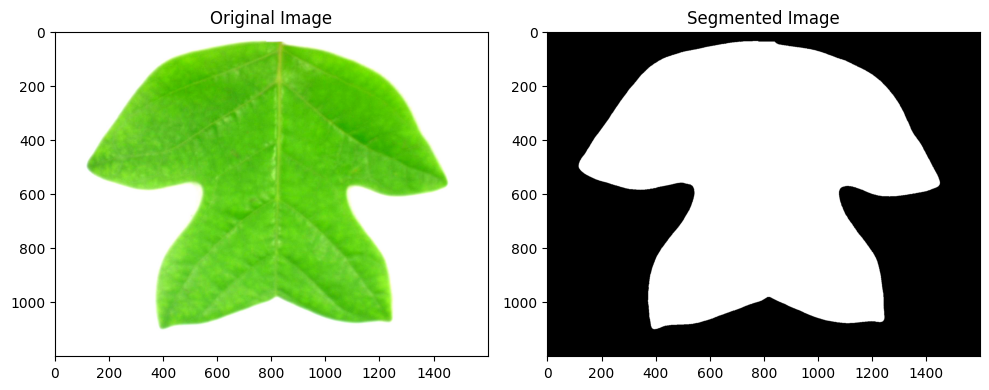

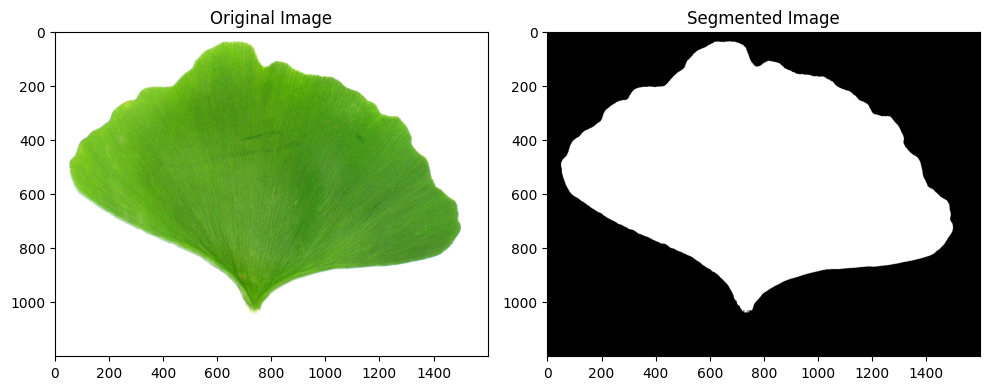

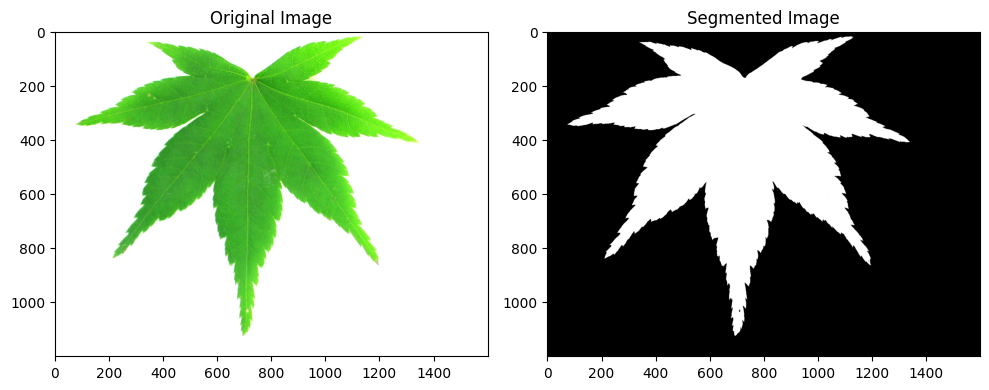

In [2]:
import cv2
import matplotlib.pyplot as plt
from main import images

for image in images:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to segment the image
    _, segmented_image = cv2.threshold(gray_image, 230, 255, cv2.THRESH_BINARY_INV)

#    Pixels with intensities > 230 will be set to the maximum value = 1,
#    while pixels with intensities lower than 1 will be set to 0.
 
    # Display the segmented image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')

    plt.tight_layout()
    plt.show()

**BINARY**<br>
 Les images binaires sont des images qui ne contiennent que deux valeurs distinctes de pixel, généralement noir et blanc (0 pour noir et 1 ou 255 pour blanc). Elles sont souvent utilisées pour la segmentation<br>
**Images en niveaux de gris**<br>
 Les images en niveaux de gris sont des images où chaque pixel possède une valeur de luminosité, généralement représentée sur une échelle de 0 (noir) à 255 (blanc) dans une image codée sur 8 bits. Ces images ne contiennent pas de couleurs, mais seulement des niveaux de gris variant du noir au blanc, avec des nuances intermédiaires pour représenter différents niveaux de luminosité.

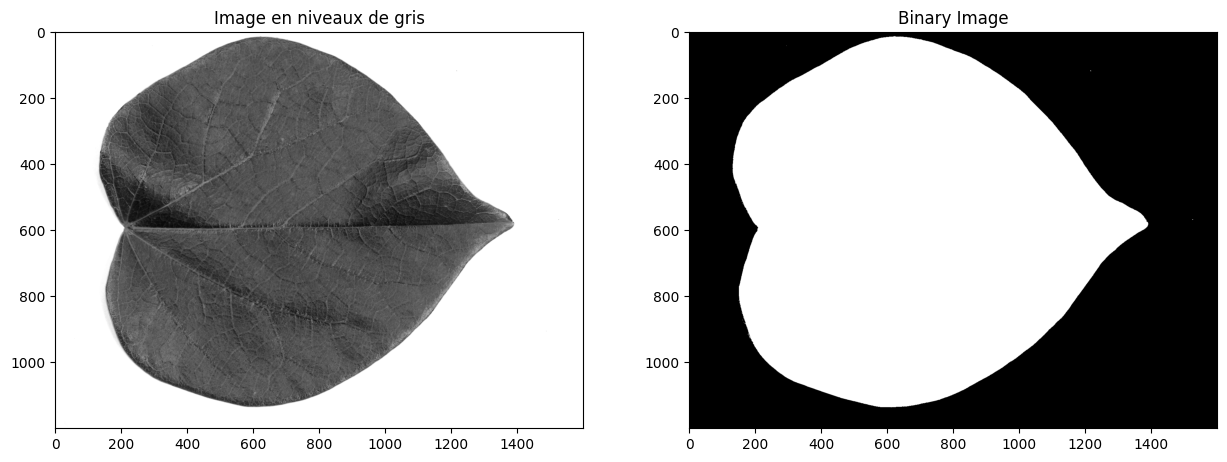

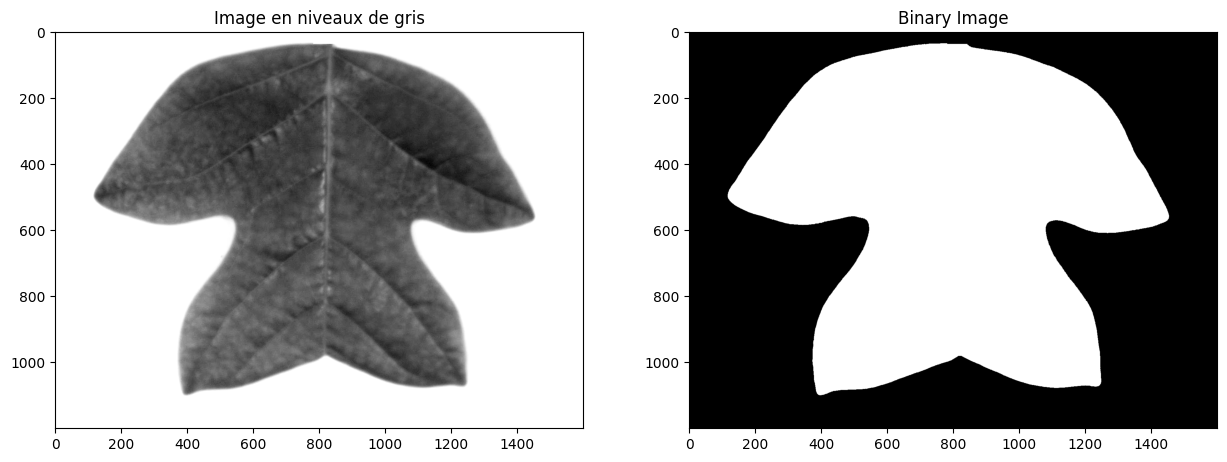

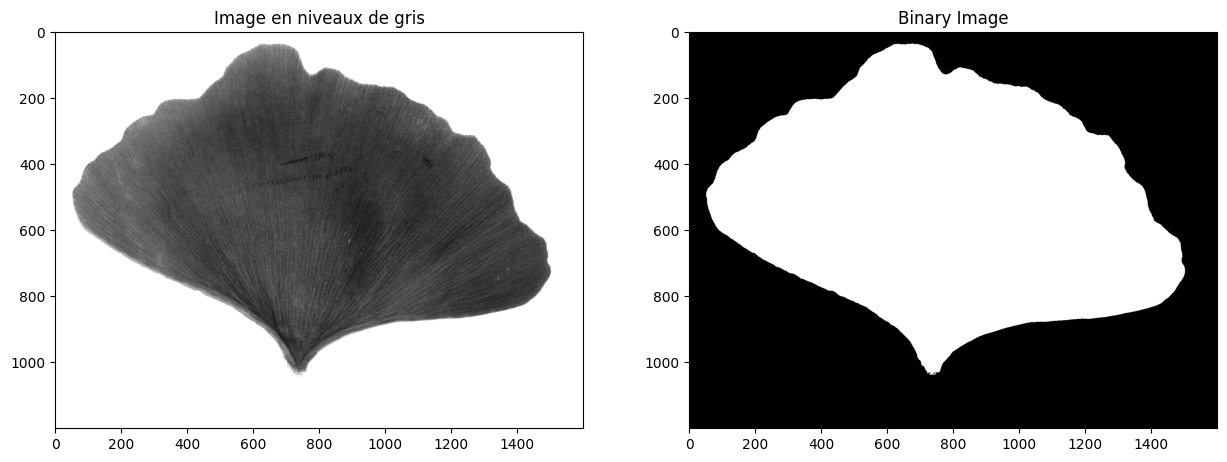

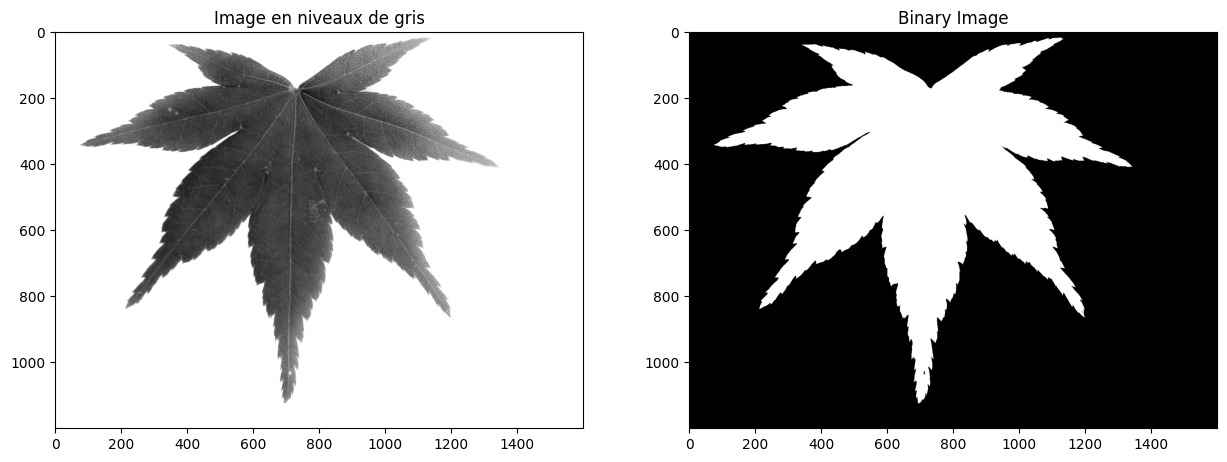

In [3]:
import cv2
import matplotlib.pyplot as plt
from main import images


for image in images:
    # Conversion en niveau de gris
    image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Conversion en image binaire (utilisation d'une méthode de seuillage, par exemple)
    _, image_binaire = cv2.threshold(image_grayscale, 230, 255, cv2.THRESH_BINARY_INV)


    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 1)
    plt.imshow(image_grayscale, cmap='gray')
    plt.title('Image en niveaux de gris')

    plt.subplot(1, 2, 2)
    plt.imshow(image_binaire, cmap='gray')
    plt.title('Binary Image')

    plt.show()

**Frontière**

28


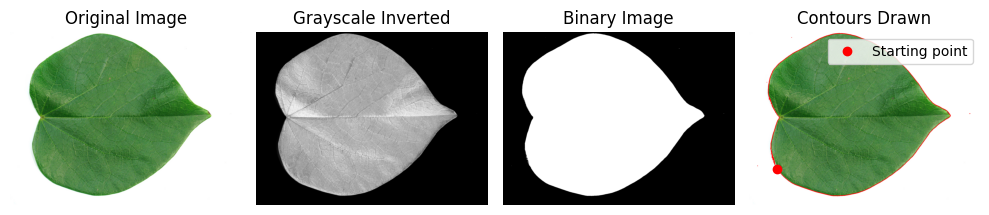

1


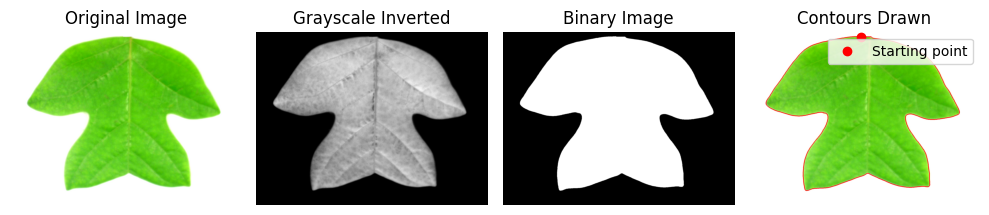

1


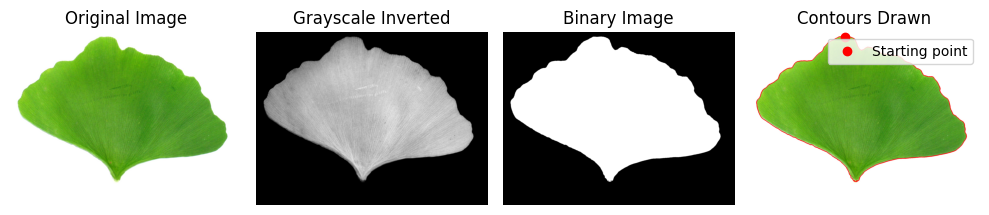

1


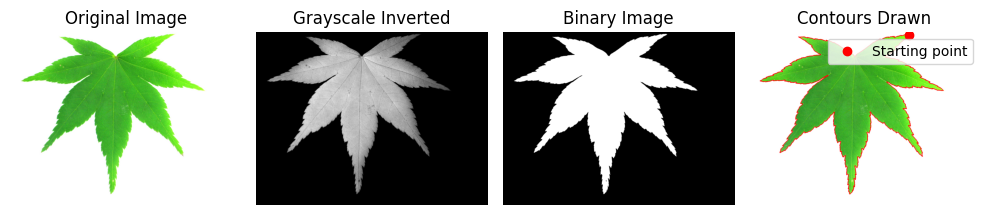

In [4]:
import cv2
import matplotlib.pyplot as plt
from main import images

for image in images:

    image1_copy = image.copy()

    # Convert the image to grayscale
    image_grayscale = cv2.cvtColor(image1_copy, cv2.COLOR_BGR2GRAY)
    # matplotlib works with rgb images while cv2 works with bgr
    # to transform to binary the back has to be black and the object has to be white
    gray_inverted = cv2.bitwise_not(image_grayscale)

    # Conversion to a binary image using thresholding
    _, image_binaire = cv2.threshold(gray_inverted, 20, 255, cv2.THRESH_BINARY)

    # Find all contours in the binary image without approximation
    contours, hierarchy = cv2.findContours(image_binaire, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Create a copy of the original image to draw contours
    contour_image = image.copy()

    # Draw all the detected contours on the image copy
    cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 3)
    print(len(contours))
    first_contour = contours[0]  # Access the first contour
    x, y= first_contour[0][0]

    # Plotting all the steps
    fig, axs = plt.subplots(1, 4, figsize=(10, 10))
    # Plot original image
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Plot grayscale image
    axs[1].imshow(gray_inverted, cmap='gray')
    axs[1].set_title('Grayscale Inverted')
    axs[1].axis('off')

    # Plot binary image
    axs[2].imshow(image_binaire, cmap='gray')
    axs[2].set_title('Binary Image')
    axs[2].axis('off')

    # Plot image with contours
    axs[3].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    axs[3].scatter(x, y, color='red',label='Starting point')
    axs[3].legend()
    axs[3].set_title('Contours Drawn')
    axs[3].axis('off')

    plt.tight_layout()
    plt.show()


***Centre de gravité + le cercle + les secteurs***

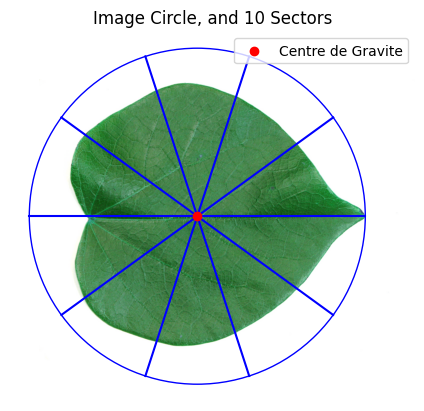

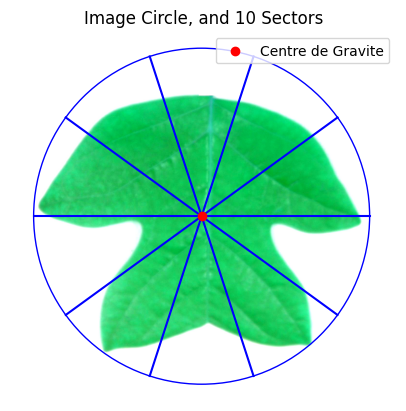

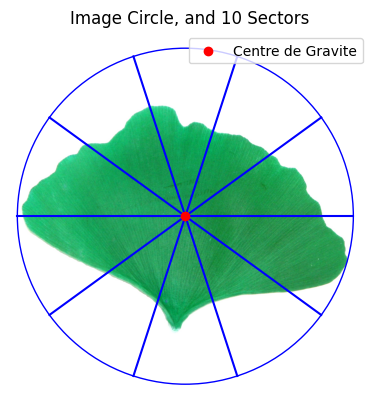

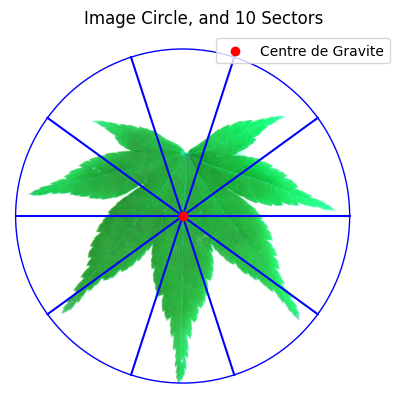

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

for image in images:
    image1_copy = image.copy()

    # Convert the image to grayscale
    image_grayscale = cv2.cvtColor(image1_copy, cv2.COLOR_BGR2GRAY)
    gray_inverted = cv2.bitwise_not(image_grayscale)

    # Conversion to a binary image using thresholding
    _, image_binaire = cv2.threshold(gray_inverted, 20, 255, cv2.THRESH_BINARY)

    # Find all contours in the binary image without approximation
    contours, _ = cv2.findContours(image_binaire, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Create a copy of the original image to draw contours
    contour_image = image.copy()

    # Calculate the moments of the contour to find the centroid
    if len(contours) > 0:
        M = cv2.moments(contours[-1])
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Calculate the bounding circle's radius
            max_distance = max(np.linalg.norm(point[0] - (cX, cY)) for point in contours[-1])

            # Draw a circle around the centroid with the calculated radius
            plt.gca().add_patch(plt.Circle((cX, cY), radius=max_distance, color='blue', fill=False))

            # Divide the circle into 10 sectors (Draw lines from centroid to perimeter)
            sectors = 10
            angle_increment = 2 * np.pi / sectors  
            for i in range(sectors):
                angle = i * angle_increment
                x_endpoint = cX + max_distance * np.cos(angle)
                y_endpoint = cY + max_distance * np.sin(angle)
                plt.plot([cX, x_endpoint], [cY, y_endpoint], color='blue', zorder=1)


    # Display the original image with contours, circle, and sectors
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.imshow(contour_image)  # Overlay contours with transparency
    plt.title('Image Circle, and 10 Sectors')
    # Scatter the center point in pink color
    plt.scatter(cX, cY, color='red',label='Centre de Gravite',zorder=2)
    plt.legend()
    plt.axis('off')
    plt.show()

**Les points d'interpolation**


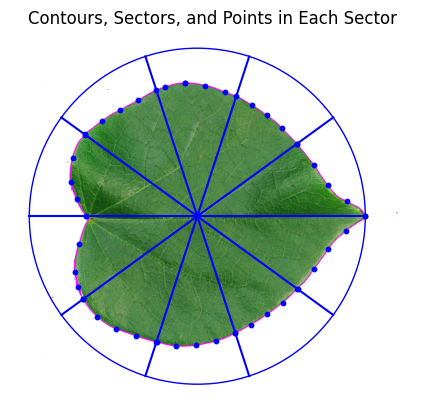

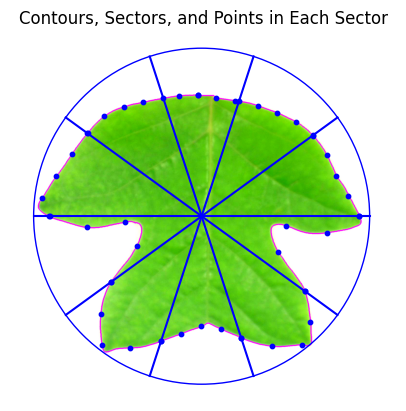

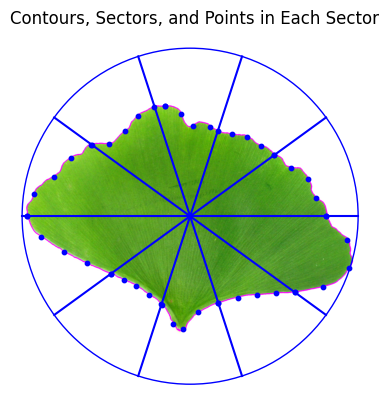

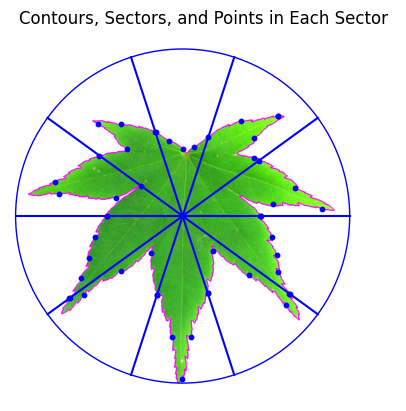

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

for image in images:
    image1_copy = image.copy()

    # Convert the image to grayscale
    image_grayscale = cv2.cvtColor(image1_copy, cv2.COLOR_BGR2GRAY)
    gray_inverted = cv2.bitwise_not(image_grayscale)

    # Conversion to a binary image using thresholding
    _, image_binaire = cv2.threshold(gray_inverted, 20, 255, cv2.THRESH_BINARY)

    # Find all contours in the binary image without approximation
    contours, _ = cv2.findContours(image_binaire, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Create a copy of the original image to draw contours
    contour_image = image.copy()


    # Draw all the detected contours on the image copy
    cv2.drawContours(contour_image, contours, -1, (255, 0, 255), 3)
    # Plot image with contours and sectors
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))


    # Calculate the moments of the contour to find the centroid
    if len(contours) > 0:
        M = cv2.moments(contours[-1])
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Calculate the bounding circle's radius
            max_distance = max(np.linalg.norm(point[0] - (cX, cY)) for point in contours[-1])

            # Draw a circle around the centroid with the calculated radius
            plt.gca().add_patch(plt.Circle((cX, cY), radius=max_distance, color='blue', fill=False))

            # Divide the circle into 10 sectors (Draw lines from centroid to perimeter)
            sectors = 10
            angle_increment = 2 * np.pi / sectors 
            for i in range(sectors):
                angle = i * angle_increment
                x_endpoint = cX + max_distance * np.cos(angle)
                y_endpoint = cY + max_distance * np.sin(angle)
                plt.plot([cX, x_endpoint], [cY, y_endpoint], color='blue')

                sector_contour = contours[-1]
                sector_points = [point[0] for point in sector_contour if
                                i * angle_increment <= np.arctan2(point[0][1] - cY, point[0][0] - cX) % (
                                        2 * np.pi) <= (i + 1) * angle_increment]

                # Select the first and last point of the contour within the sector
                first_point_in_sector = sector_points[0]
                last_point_in_sector = sector_points[-1]

                # Divide the remaining sector into quartiles
                num_points = len(sector_points)
                quartile_indices = [num_points // 4, num_points // 2, 3 * num_points // 4]

                # Select the points corresponding to quartiles
                quartile_points = [first_point_in_sector] + [sector_points[idx] for idx in quartile_indices] + [last_point_in_sector]

                # Plotting the quartile points in the sector
                for point in quartile_points:
                    x, y = point
                    plt.scatter(x, y, color='blue', s=10)  # Plotting points in blue colorr


    plt.title('Contours, Sectors, and Points in Each Sector')
    plt.axis('off')
    plt.show()


**Interpolation avec 3 points** 

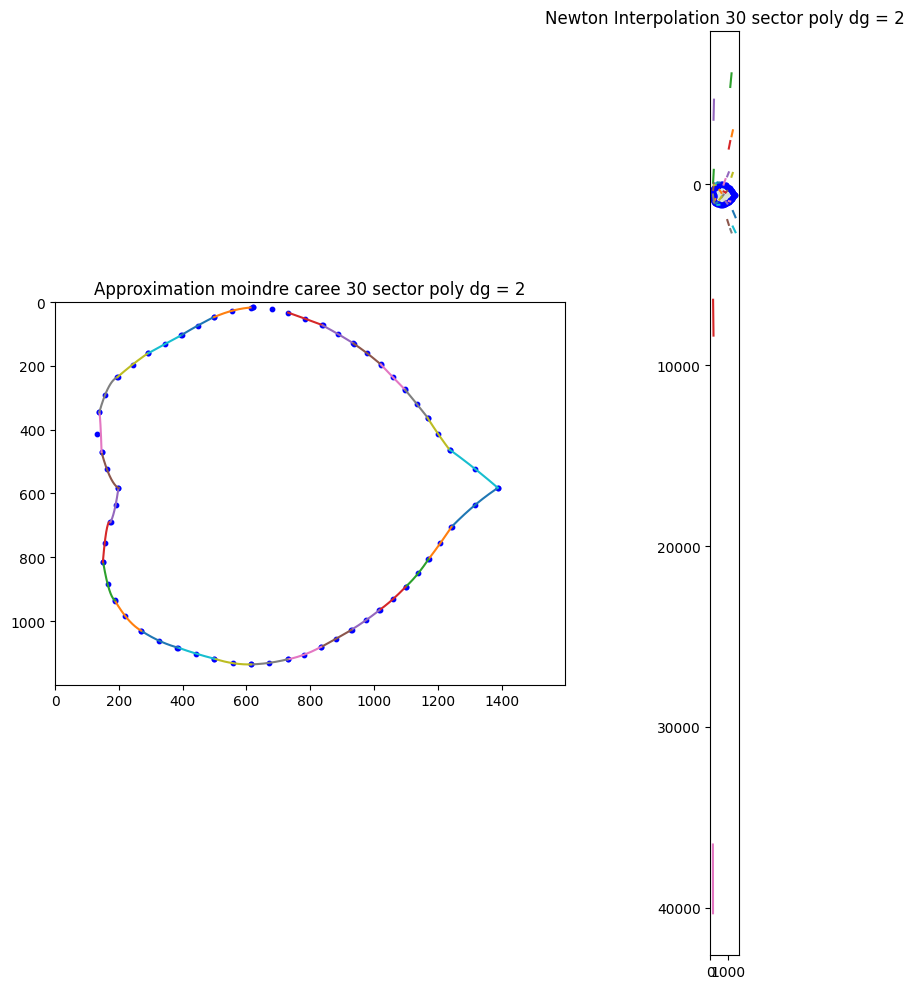

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


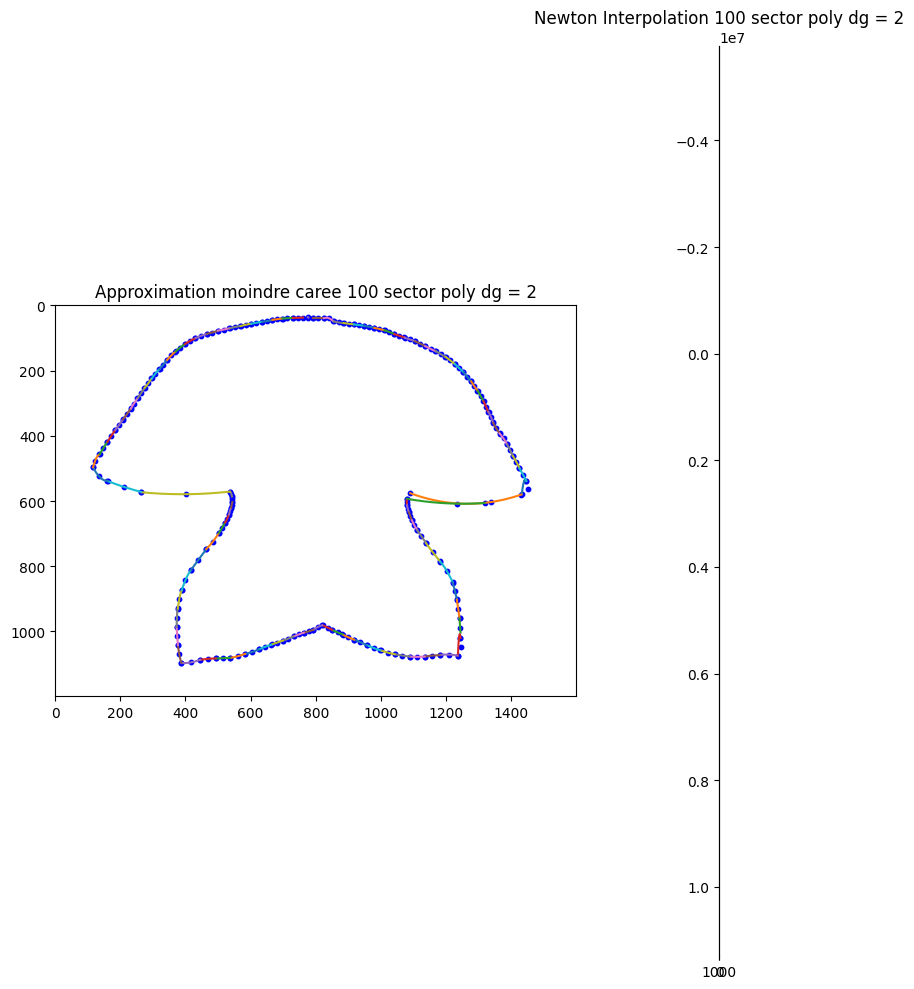

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


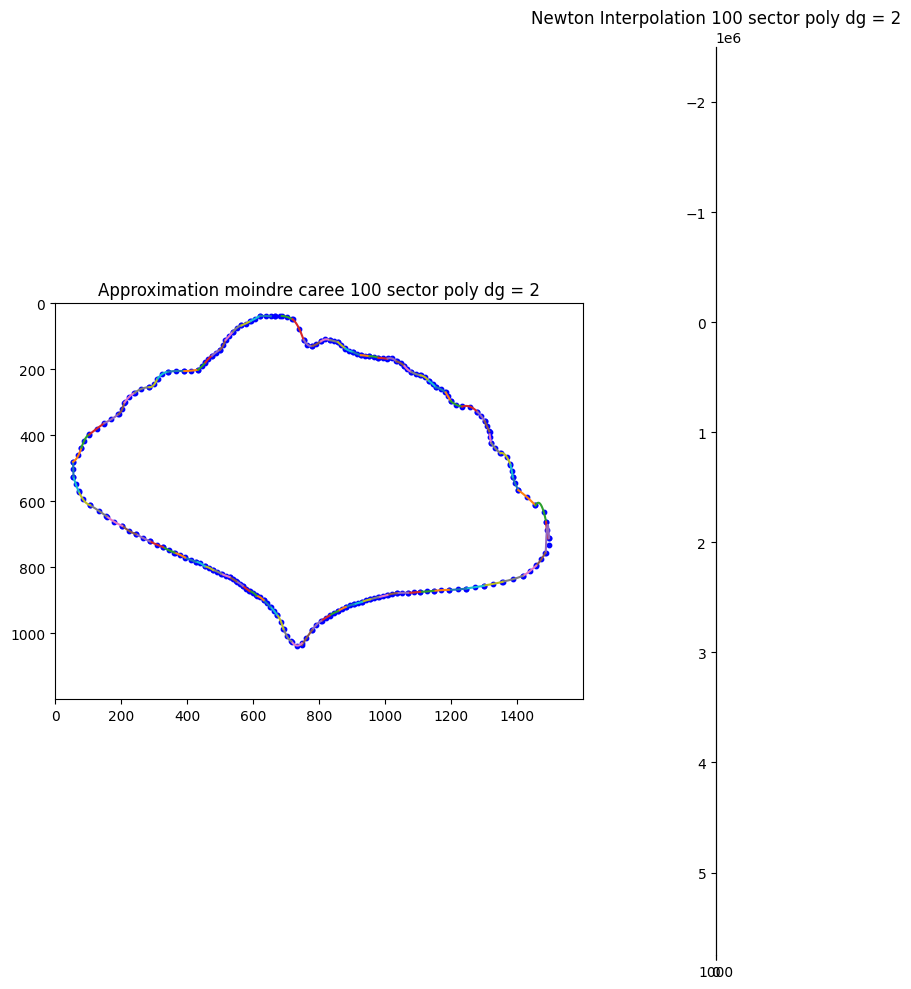

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


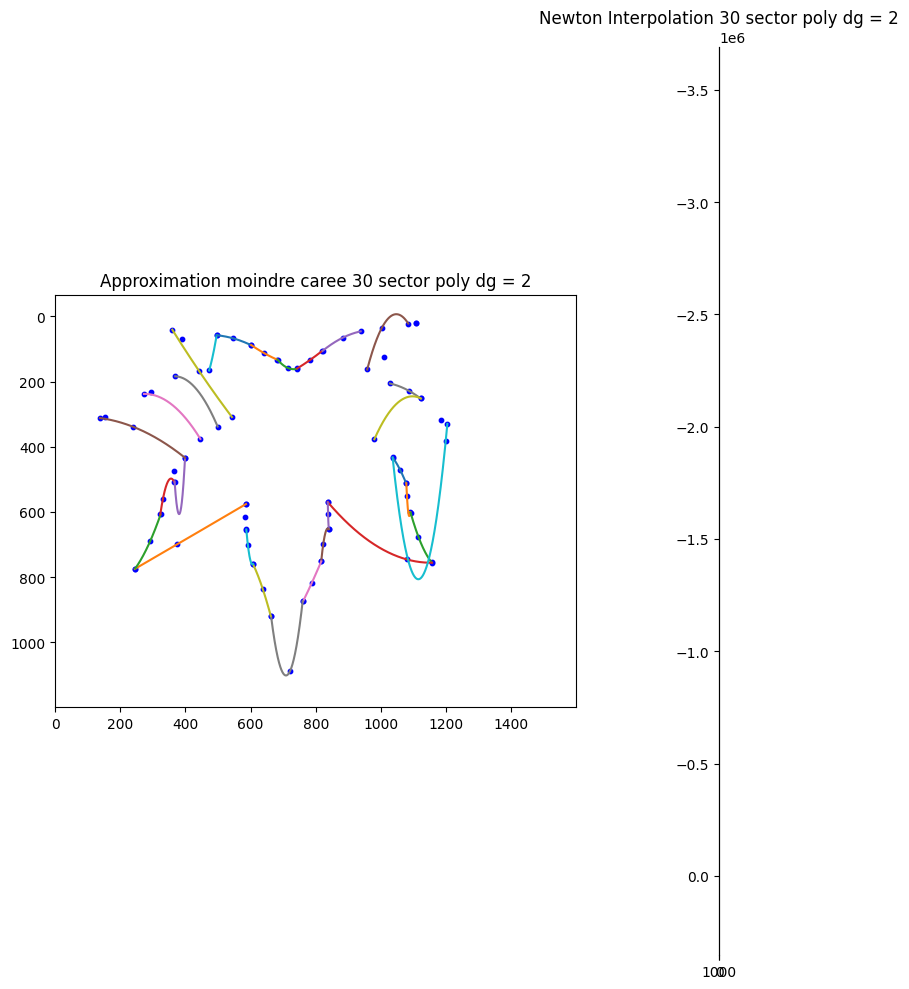

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from main import images
from interpolation import newton_interpolation

secteurs = [30, 100, 100, 30]

for key, image in enumerate(images):
    image1_copy = image.copy()

    # Convert the image to grayscale
    image_grayscale = cv2.cvtColor(image1_copy, cv2.COLOR_BGR2GRAY)
    gray_inverted = cv2.bitwise_not(image_grayscale)

    # Conversion to a binary image using thresholding
    _, image_binaire = cv2.threshold(gray_inverted, 20, 255, cv2.THRESH_BINARY)

    # Find all contours in the binary image without approximation
    contours, _ = cv2.findContours(image_binaire, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Create subplots to display the image and the polynomials side by side
    fig, axs = plt.subplots(1, 2, figsize=(10,10))
    
    # Calculate the moments of the contour to find the centroid
    if len(contours) > 0:
        M = cv2.moments(contours[-1])
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Calculate the bounding circle's radius
            max_distance = max(np.linalg.norm(point[0] - (cX, cY)) for point in contours[-1])

            # Divide the circle into sectors (Draw lines from centroid to perimeter)
            sector = secteurs[key]
            angle_increment = 2 * np.pi / sector

            # Plot image with contours and sectors
            axs[0].imshow(cv2.cvtColor(image1_copy, cv2.COLOR_BGR2RGB), alpha=0) # polyfit(app moindre caree)
            axs[1].imshow(cv2.cvtColor(image1_copy, cv2.COLOR_BGR2RGB), alpha=0.2) # newton

            for i in range(sector):
                angle = i * angle_increment
                x_endpoint = cX + max_distance * np.cos(angle)
                y_endpoint = cY + max_distance * np.sin(angle)

                # Find the contour points within the current sector
                sector_contour = contours[-1]
                sector_points = [point[0] for point in sector_contour if
                                i * angle_increment <= np.arctan2(point[0][1] - cY, point[0][0] - cX) % (
                                        2 * np.pi) <= (i + 1) * angle_increment]

                # Select the first and last point of the contour within the sector
                first_point_in_sector = sector_points[0]
                last_point_in_sector = sector_points[-1]

                # Divide the remaining sector into quartiles
                num_points = len(sector_points)
                # quartile_indices = [num_points // 4, num_points // 2, 3 * num_points // 4] 
                quartile_indices = [num_points // 2] 

                # Select the points corresponding to quartiles
                quartile_points =  [first_point_in_sector] + [sector_points[idx] for idx in quartile_indices] + [last_point_in_sector]

                # Plotting the quartile points in the sector
                for point in quartile_points:
                    x, y = point
                    axs[0].scatter(x, y, color='blue', s=10)
                    axs[1].scatter(x, y, color='blue', s=10)


                # Fit a cubic polynomial through the three points
                x_values = np.array([point[0] for point in quartile_points])
                y_values = np.array([point[1] for point in quartile_points])

                # Fit a polynomial using np.polyfit (change the degree as needed)
                degree = 2
                coefficients_np_polyfit = np.polyfit(x_values, y_values, degree)
                poly_np_polyfit = np.poly1d(coefficients_np_polyfit)
                # print('Polynome',poly_np_polyfit)
                # Generate x values for the curve plot
                x_curve = np.linspace(min(first_point_in_sector[0], last_point_in_sector[0]),max(first_point_in_sector[0], last_point_in_sector[0]), 400)
                y_curve = poly_np_polyfit(x_curve)

                # Plot the polynomial curve using np.polyfit
                axs[0].plot(x_curve, y_curve)

                # Fit a polynomial using newton_interpolation
                coefficients_newton = newton_interpolation(x_values, y_values)
                poly_newton = np.poly1d(coefficients_newton[::-1])  # Reverse coefficients for np.poly1d
                # print('Newton',poly_newton)

                # Plot polynomial curve using newton_interpolation
                axs[1].plot(x_curve, poly_newton(x_curve))

            axs[0].set_title('Approximation moindre caree '+str(secteurs[key])+' sector poly dg = '+str(degree))
            axs[1].set_title('Newton Interpolation '+str(secteurs[key])+' sector poly dg = '+str(len(quartile_points)-1))
            plt.tight_layout()
            plt.show()


**Interpolation avec 5 points**

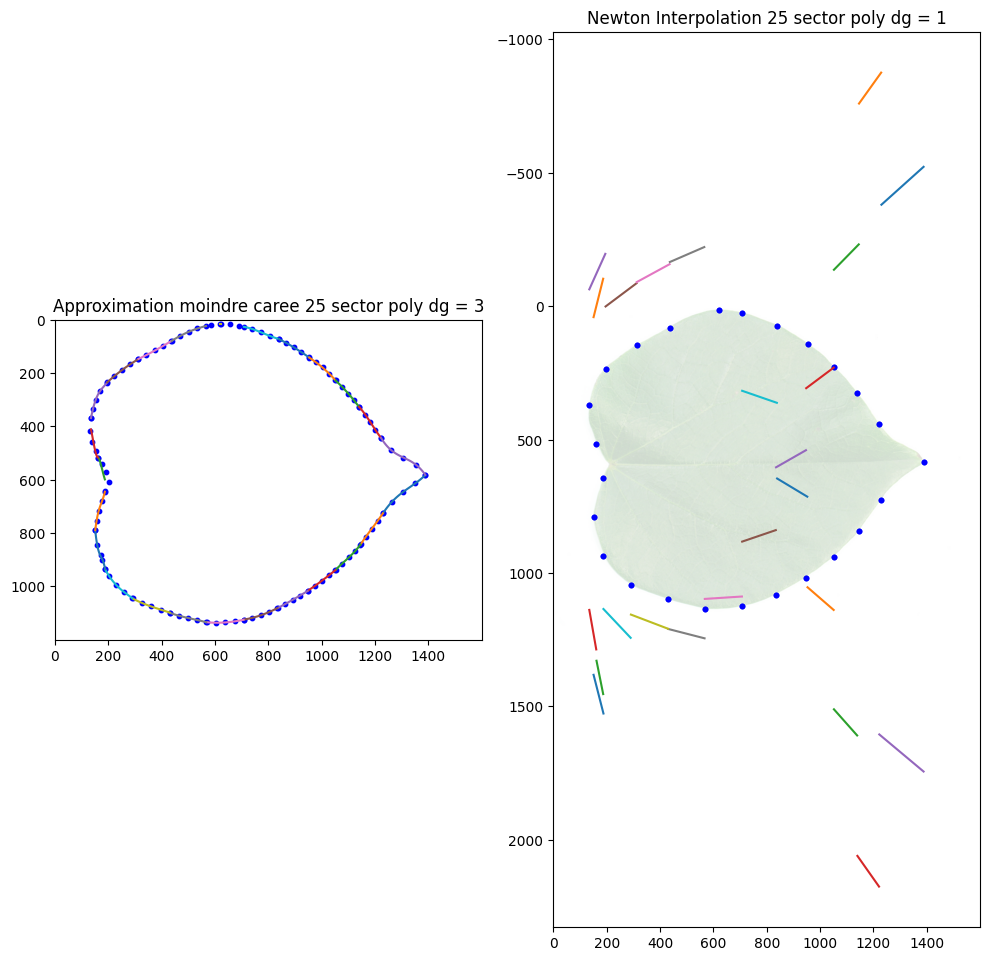

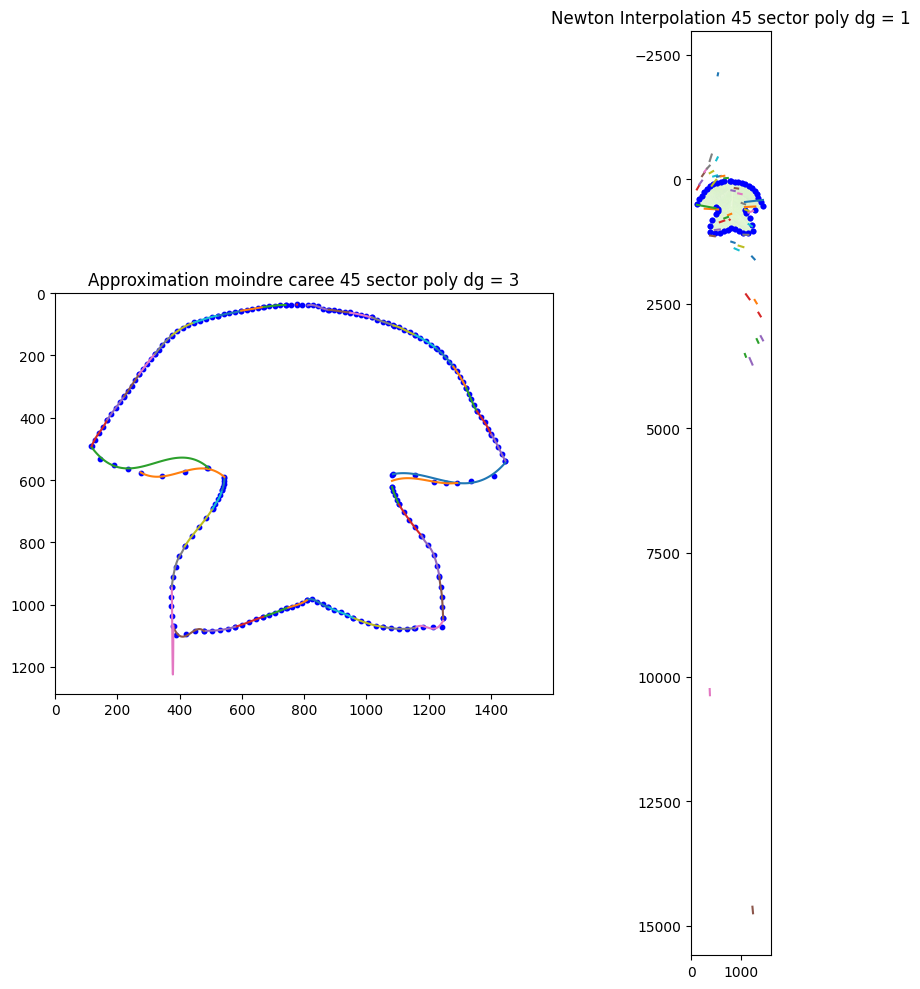

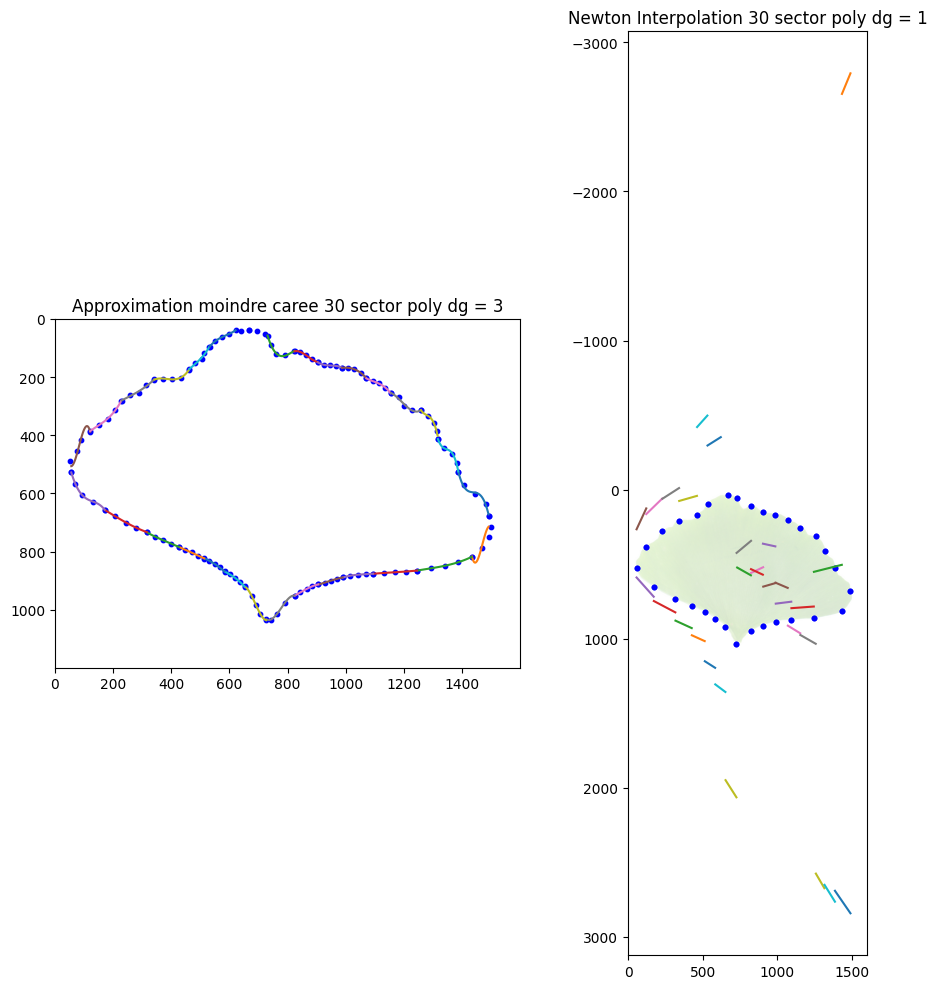

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


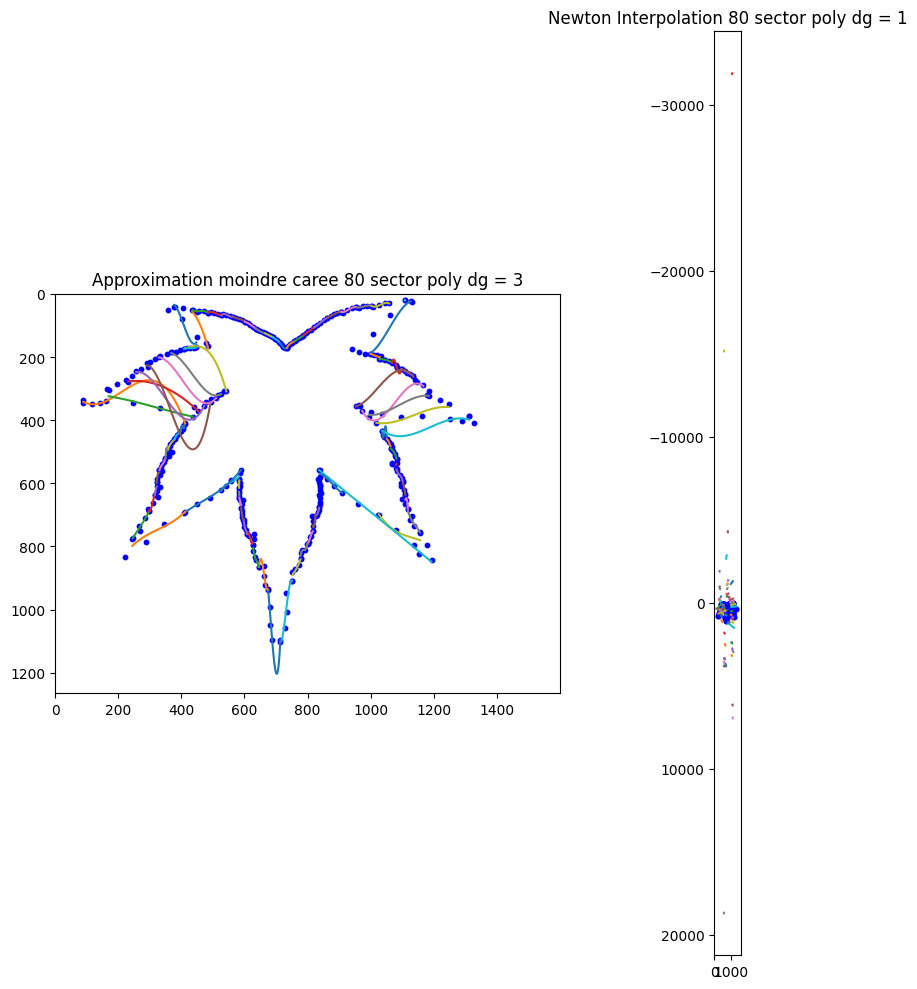

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from main import images
from interpolation import newton_interpolation

secteurs = [25, 45, 30, 80]
for key, image in enumerate(images):
    image1_copy = image.copy()

    # Convert the image to grayscale
    image_grayscale = cv2.cvtColor(image1_copy, cv2.COLOR_BGR2GRAY)
    gray_inverted = cv2.bitwise_not(image_grayscale)

    # Conversion to a binary image using thresholding
    _, image_binaire = cv2.threshold(gray_inverted, 20, 255, cv2.THRESH_BINARY)

    # Find all contours in the binary image without approximation
    contours, _ = cv2.findContours(image_binaire, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Create subplots to display the image and the polynomials side by side
    fig, axs = plt.subplots(1, 2, figsize=(10,10))  # Three subplots for each image

    # Calculate the moments of the contour to find the centroid
    if len(contours) > 0:
        M = cv2.moments(contours[-1])
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Calculate the bounding circle's radius
            max_distance = max(np.linalg.norm(point[0] - (cX, cY)) for point in contours[-1])

            # Divide the circle into 10 sectors (Draw lines from centroid to perimeter)
            sector = secteurs[key]
            angle_increment = 2 * np.pi / sector  

            # Plot image with contours and sectors
            axs[0].imshow(cv2.cvtColor(image1_copy, cv2.COLOR_BGR2RGB), alpha=0) # polyfit(approx moindre caree)
            axs[1].imshow(cv2.cvtColor(image1_copy, cv2.COLOR_BGR2RGB), alpha=0.2) # newton

            for i in range(sector):
                angle = i * angle_increment
                x_endpoint = cX + max_distance * np.cos(angle)
                y_endpoint = cY + max_distance * np.sin(angle)

                # Find the contour points within the current sector
                sector_contour = contours[-1]
                sector_points = [point[0] for point in sector_contour if
                                i * angle_increment <= np.arctan2(point[0][1] - cY, point[0][0] - cX) % (
                                        2 * np.pi) <= (i + 1) * angle_increment]

                # Select the first and last point of the contour within the sector
                first_point_in_sector = sector_points[0]
                last_point_in_sector = sector_points[-1]

                # Divide the remaining sector into quartiles
                num_points = len(sector_points)
                quartile_indices = [num_points // 4, num_points // 2, 3 * num_points // 4] 

                # Select the points corresponding to quartiles
                quartile_points =  [first_point_in_sector] + [sector_points[idx] for idx in quartile_indices] + [last_point_in_sector]

                # Plotting the quartile points in the sector
                for point in quartile_points:
                    x, y = point
                    axs[0].scatter(x, y, color='blue', s=10)


                # Fit a cubic polynomial through the three points
                x_values = np.array([point[0] for point in quartile_points])
                y_values = np.array([point[1] for point in quartile_points])

                # Fit a polynomial using np.polyfit (change the degree as needed)
                degree = 3
                x_curve = np.linspace(min(first_point_in_sector[0], last_point_in_sector[0]),max(first_point_in_sector[0], last_point_in_sector[0]), 100)
                coefficients_np_polyfit = np.polyfit(x_values, y_values, degree)
                poly_np_polyfit = np.poly1d(coefficients_np_polyfit)
                # Generate x values for the curve plot
                y_curve = poly_np_polyfit(x_curve)
                # Plot polynomial curve using np.polyfit
                axs[0].plot(x_curve, y_curve)

                # Fit a polynomial using newton_interpolation_polynomial
                points =  [first_point_in_sector] + [last_point_in_sector]
                for point in points:
                        axs[1].scatter(x, y, color='blue', s=10)
                y_values = np.array([point[1] for point in points])
                x_values = np.array([point[0] for point in points])
                coefficients_newton = newton_interpolation(x_values, y_values)
                poly_newton = np.poly1d(coefficients_newton[::-1])  # Reverse coefficients for np.poly1d
                y_curve = poly_newton(x_curve)

                # Plot the polynomial curve 
                axs[1].plot(x_curve, y_curve)

            axs[0].set_title('Approximation moindre caree '+str(secteurs[key])+' sector poly dg = '+str(degree))
            axs[1].set_title('Newton Interpolation '+str(secteurs[key])+' sector poly dg = '+str(len(points)-1))
            plt.tight_layout()
            plt.show()


**ERRORS**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from interpolation import newton_interpolation
from main import images

secteurs = [25, 45, 30, 80]
for key, image in enumerate(images):
    image1_copy = image.copy()

    # Convert the image to grayscale
    image_grayscale = cv2.cvtColor(image1_copy, cv2.COLOR_BGR2GRAY)
    gray_inverted = cv2.bitwise_not(image_grayscale)

    # Conversion to a binary image using thresholding
    _, image_binaire = cv2.threshold(gray_inverted, 20, 255, cv2.THRESH_BINARY)

    # Find all contours in the binary image without approximation
    contours, _ = cv2.findContours(image_binaire, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Calculate the moments of the contour to find the centroid
    if len(contours) > 0:
        M = cv2.moments(contours[-1])
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Calculate the bounding circle's radius
            max_distance = max(np.linalg.norm(point[0] - (cX, cY)) for point in contours[-1])

            # Divide the circle into 10 sectors 
            sector = secteurs[key]
            angle_increment = 2 * np.pi / sector  

            for i in range(sector):
                angle = i * angle_increment
                x_endpoint = cX + max_distance * np.cos(angle)
                y_endpoint = cY + max_distance * np.sin(angle)

                # Find the contour points within the current sector
                sector_contour = contours[-1]
                sector_points = [point[0] for point in sector_contour if
                                i * angle_increment <= np.arctan2(point[0][1] - cY, point[0][0] - cX) % (
                                        2 * np.pi) <= (i + 1) * angle_increment]

                # Select the first and last point of the contour within the sector
                first_point_in_sector = sector_points[0]
                last_point_in_sector = sector_points[-1]

                # Divide the remaining sector into quartiles
                num_points = len(sector_points)
                quartile_indices = [num_points // 4, num_points // 2, 3 * num_points // 4] 

                # Select the points corresponding to quartiles
                quartile_points =  [first_point_in_sector] + [sector_points[idx] for idx in quartile_indices] + [last_point_in_sector]

                # Fit a polynomial through the points
                x_values = np.array([point[0] for point in quartile_points])
                y_values = np.array([point[1] for point in quartile_points])

                # Fit a polynomial using np.polyfit (change the degree as needed)
                degree = 3
                x_curve = np.linspace(min(first_point_in_sector[0], last_point_in_sector[0]),max(first_point_in_sector[0], last_point_in_sector[0]), 100)
                coefficients_np_polyfit = np.polyfit(x_values, y_values, degree)
                poly_np_polyfit = np.poly1d(coefficients_np_polyfit)
                y_curve_polyfit = poly_np_polyfit(x_curve)

                # Fit a polynomial using newton_interpolation
                points =  [first_point_in_sector] + [last_point_in_sector]
                y_values = np.array([point[1] for point in points])
                x_values = np.array([point[0] for point in points])
                coefficients_newton = newton_interpolation(x_values, y_values)
                poly_newton = np.poly1d(coefficients_newton[::-1])  # Reverse coefficients for np.poly1d
                y_curve_newton = poly_newton(x_curve)

                # Inside the loop for each segment
                errors_L_inf = []
                errors_L_1 = []
                errors_L_2 = []

                # Calculate errors moindre carre (polyfit)
                for point in quartile_points:
                    x, y = point
                    # Calculate errors using different norms for moindre carre (polyfit)
                    errors_L_inf.append(abs(y - poly_np_polyfit(x)))    # L_inf norm (maximum absolute difference)
                    errors_L_1.append(abs(y - poly_np_polyfit(x)))      # L_1 norm (sum of absolute differences)
                    errors_L_2.append((y - poly_np_polyfit(x)) ** 2)   # L_2 norm (sum of squared differences)
                # Compute the norms for moindre carre (polyfit)
                L_inf_norm_polyfit = max(errors_L_inf)
                L_1_norm_polyfit = sum(errors_L_1)
                L_2_norm_polyfit = np.sqrt(sum(errors_L_2))

                print(f"Image {key + 1} Norms moindre caree:")
                print(f"L_inf norm: {L_inf_norm_polyfit}")
                print(f"L_1 norm: {L_1_norm_polyfit}")
                print(f"L_2 norm: {L_2_norm_polyfit}")

                # Clear the error lists before computing errors for Newton's method
                errors_L_inf = []
                errors_L_1 = []
                errors_L_2 = []

                # Calculate errors for Newton's method
                for point in points:
                    x, y = point
                    # Calculate errors using different norms for Newton's method
                    errors_L_inf.append(abs(y - poly_newton(x)))    # L_inf norm (maximum absolute difference)
                    errors_L_1.append(abs(y - poly_newton(x)))      # L_1 norm (sum of absolute differences)
                    errors_L_2.append((y - poly_newton(x)) ** 2)   # L_2 norm (sum of squared differences)
                # Compute the norms for Newton's method
                L_inf_norm_newton = max(errors_L_inf)
                L_1_norm_newton = sum(errors_L_1)
                L_2_norm_newton = np.sqrt(sum(errors_L_2))

                print(f"Image {key + 1} Norms Newton:")
                print(f"L_inf norm: {L_inf_norm_newton}")
                print(f"L_1 norm: {L_1_norm_newton}")
                print(f"L_2 norm: {L_2_norm_newton}")
